## Introduction


#### data collection
   For my final project I took a different approach than usual. Most of the work went into collecting the data, and all of the data collected was collected **manually** using computer vision alogrithms. The data collection was time consuming, because when it comes to images, it is difficult to find consistent datasets of high quality, and very often it is better to collect the data yourself if you expect better results. The images collected had to be of high resolution and the objects analysed had to be set in similar conditions.The dataset consists of **161** rows, **40** independent variables and **one binary dependent variable**.
   
#### how were the variables calculated?  
   Each independent vriable was calculated manually by accessing and manipulating/performing variety of calculations on the outputs of the computer vision algorithm. For simplicity, since this is the first time I am analyzing this dataset,the dependent variable has only two possible values - a zero or one.
   
#### what are we testing?
   What we are testing is whether it is possible to create a successful machine learning model in a specific area given the current computer vision algorithms, or whether the idependent variables that we have created are effective.

#### importing packages

In [211]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings

from tabulate import tabulate
from collections import Counter
warnings.filterwarnings('ignore')

from scipy.stats import shapiro


from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, feature_selection
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet

from IPython.display import Markdown, display 
def printmd(string):  
    display(Markdown(string)) 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#### loading the dataset
We have two datasets that we will merge into one dataset. We have a group zero and group one dataset, where the name of thedataset corresponds to the setting of the dependent variable.

In [137]:
group_zero = pd.read_csv('group_0.csv', sep = ',')
group_zero = pd.DataFrame(group_zero)
group_zero = group_zero.drop('Unnamed: 0', 1)

group_one = pd.read_csv('group_1.csv')
group_one = pd.DataFrame(group_one)
group_one = group_one.drop('Unnamed: 0', 1)

dataset = pd.concat([group_one, group_zero])
dataset = dataset.reset_index(drop = True)

In [138]:
dataset.head()

,s1,s2,a1,a2,a3,a4,a5,a6,a7,a8,...,d8,d9,d10,d11,d12,d13,d14,da1,da2,dependent_variable
0,0.988171,1.015837,0.469504,0.643399,0.029326,0.039712,1.370381,0.062463,0.250641,0.045580,...,2.074620,0.368735,0.174066,0.100295,1.491224,0.838928,1.765257,0.056774,74.346721,1.0
1,0.993261,1.015130,0.460901,0.534017,0.029994,0.040411,1.158637,0.065077,0.278689,0.056167,...,1.838012,0.371789,0.163738,0.098531,1.362376,0.873452,1.980869,0.069251,51.131574,1.0
2,0.952899,0.996969,0.582219,0.673448,0.030669,0.044991,1.156693,0.052676,0.197416,0.045540,...,2.318975,0.378402,0.237374,0.093870,1.620354,0.817789,1.750943,0.051770,58.887598,1.0
3,1.027447,1.015780,0.524234,0.646384,0.031884,0.042288,1.233008,0.060820,0.259627,0.049327,...,2.036003,0.384962,0.176173,0.101794,1.788731,0.881890,1.847517,0.078233,47.303324,1.0
4,0.938300,0.986384,0.537131,0.638475,0.032529,0.043732,1.188677,0.060560,0.248614,0.050947,...,1.950197,0.364732,0.217042,0.093766,1.702355,0.786838,1.871516,0.068250,52.748045,1.0


In [139]:
dataset.describe()

,s1,s2,a1,a2,a3,a4,a5,a6,a7,a8,...,d8,d9,d10,d11,d12,d13,d14,da1,da2,dependent_variable
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,...,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,0.996390,0.996791,0.485506,0.534339,0.027376,0.038186,1.139001,0.058204,0.231206,0.052052,...,2.036170,0.377036,0.210644,0.097313,1.532772,0.838355,1.982741,0.093177,47.961266,0.496894
std,0.040036,0.028197,0.125564,0.112107,0.004776,0.006287,0.248564,0.009754,0.044243,0.007130,...,0.192208,0.022331,0.026427,0.013019,0.181163,0.093591,0.345395,0.038169,15.730940,0.501550
min,0.889248,0.925061,0.177164,0.256667,0.013376,0.020522,0.606590,0.031704,0.124251,0.032015,...,1.565657,0.317404,0.141958,0.062208,1.096573,0.597900,1.357613,0.042264,18.599050,0.000000
25%,0.970891,0.981665,0.398598,0.459745,0.024054,0.033759,0.963145,0.052172,0.205669,0.047333,...,1.902848,0.365293,0.191017,0.088744,1.407686,0.781874,1.738071,0.065703,37.942494,0.000000
50%,0.996150,0.998135,0.475263,0.533913,0.027372,0.037961,1.120553,0.057921,0.228094,0.051537,...,2.013263,0.376266,0.205241,0.096602,1.529337,0.838928,1.944464,0.083129,47.303324,0.000000
75%,1.021317,1.015018,0.565090,0.606767,0.030669,0.042363,1.286043,0.063205,0.254237,0.055884,...,2.148871,0.389253,0.227963,0.105150,1.666797,0.886279,2.134356,0.106069,57.811157,1.000000
max,1.155655,1.130099,1.001819,0.856303,0.040093,0.054425,1.954121,0.087111,0.445265,0.074726,...,2.709620,0.431936,0.288188,0.142857,2.236107,1.055041,3.309660,0.218400,89.557112,1.000000


In [140]:
if pd.isnull(dataset).sum().sum()==0:
    print("There are no missing values in the dataset.\n")
print('================= \n')
dataset.info()

There are no missing values in the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   s1                  161 non-null    float64
 1   s2                  161 non-null    float64
 2   a1                  161 non-null    float64
 3   a2                  161 non-null    float64
 4   a3                  161 non-null    float64
 5   a4                  161 non-null    float64
 6   a5                  161 non-null    float64
 7   a6                  161 non-null    float64
 8   a7                  161 non-null    float64
 9   a8                  161 non-null    float64
 10  a9                  161 non-null    float64
 11  a10                 161 non-null    float64
 12  a11                 161 non-null    float64
 13  a12                 161 non-null    float64
 14  a13                 161 non-null    float64
 15  a14        

All of our variables have correct format except our depndent variable. It should be categorical.

In [141]:
dataset['dependent_variable'] = pd.Categorical(dataset.dependent_variable)

Checking for duplicates

In [142]:
if dataset[dataset.duplicated()].count().sum() ==0:
    print("There are no duplicates")

There are no duplicates


### Exploratory Data Analysis

#### How balanced is our dataset in terms of the dependent variable?

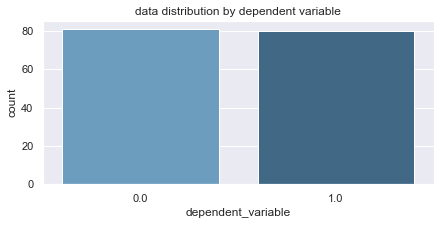

In [143]:
#countplot
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize = (7,3))
ax = sns.countplot(x = 'dependent_variable', data=dataset, palette="Blues_d").set(title='data distribution by dependent variable',)
plt.show()

## Train Test Split
We want to split our data before the preprocessing, otherwise we will train our data on the testing set as well.

In [144]:
X = dataset.drop('dependent_variable', axis = 1)
y = dataset['dependent_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27, stratify = y)

#### distributions of our variables

Now we will explore the distributions of our independent variables. Let's check their normality with statistical tests. We will use the Shapiro Wilk test, which is the most appropriate test for small sample sizes. 

In [149]:
columns = list(X_train.columns)
low_p_value_variables = []

table = []
for column in columns:
    if column != 'dependent_variable':
        statistic = shapiro(X_train[column])[0]
        p_value = shapiro(X_train[column])[1]
        if p_value > 0.05:
            table.append([column, 
                          round(statistic, 3), 
                          round(p_value, 4), 
                          ""])
        else:
            table.append([column, 
                          round(statistic, 3), 
                         round(p_value, 4), 
                          "SIGNIFICANT"])
            low_p_value_variables.append(column)
            
output = tabulate(table, headers = ["variable", "statistic", "p value", "is significant?"], tablefmt = 'fancy_grid')
print(output)

╒════════════╤═════════════╤═══════════╤═══════════════════╕
│ variable   │   statistic │   p value │ is significant?   │
╞════════════╪═════════════╪═══════════╪═══════════════════╡
│ s1         │       0.986 │    0.195  │                   │
├────────────┼─────────────┼───────────┼───────────────────┤
│ s2         │       0.949 │    0.0001 │ SIGNIFICANT       │
├────────────┼─────────────┼───────────┼───────────────────┤
│ a1         │       0.965 │    0.0022 │ SIGNIFICANT       │
├────────────┼─────────────┼───────────┼───────────────────┤
│ a2         │       0.99  │    0.509  │                   │
├────────────┼─────────────┼───────────┼───────────────────┤
│ a3         │       0.995 │    0.9408 │                   │
├────────────┼─────────────┼───────────┼───────────────────┤
│ a4         │       0.996 │    0.9767 │                   │
├────────────┼─────────────┼───────────┼───────────────────┤
│ a5         │       0.974 │    0.0135 │ SIGNIFICANT       │
├────────────┼──────────

In [215]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(128, 2)


In [217]:
X_selected.shape

(128, 2)

We have 18 variables that give out low p values. Let's see what their distributions look like and if they are highly affected by outliers. 

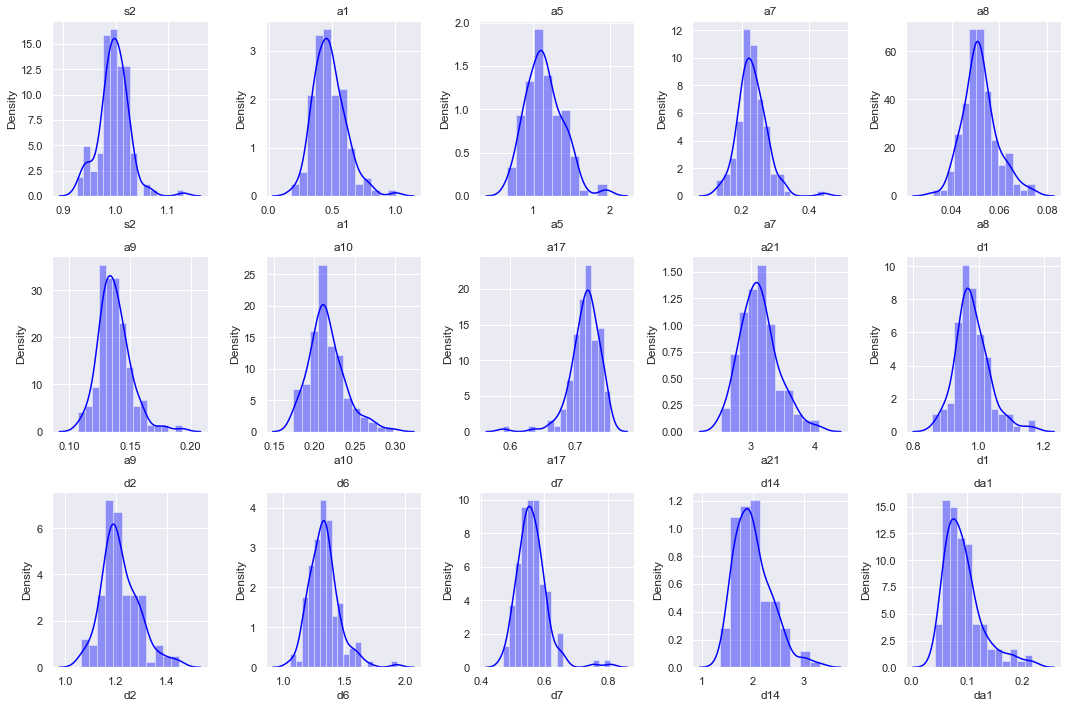

In [168]:
fig, ax1 = plt.subplots(3,5, figsize=(15,10))

k = 0
for i in range(0,3):
    for j in range(0,5):
        sns.distplot(X_train[low_p_value_variables[k]], 
                     ax = ax1[i][j], color = 'blue').set(title = low_p_value_variables[k])
            
        k += 1
        
fig.tight_layout()
plt.show()

We can see these distributions are not normal gaussian distributions. Depending on the model we decide to use, normalizing them might be a good idea. Unfortunately, since normalization formula is:

  $$X_{normalized} = \frac{ X - X_{minimum}  }{X_{maximum} - X_{minimum}} $$
  
  It is quite sensitive to outliers. If we decide to normalize, we will For now, since our go-to methods for this project are xgboost, decision tree and random forest, we don't have to normalize the data. If we want to use logistic regression, then normalization will be necessary, but we will use robust data scaling for this (data scaling that is not heavily affected by outliers)

### How do the two groups compare on each variable?
For exploratory purposes, we will plot the differences between the two groups on the entire dataset

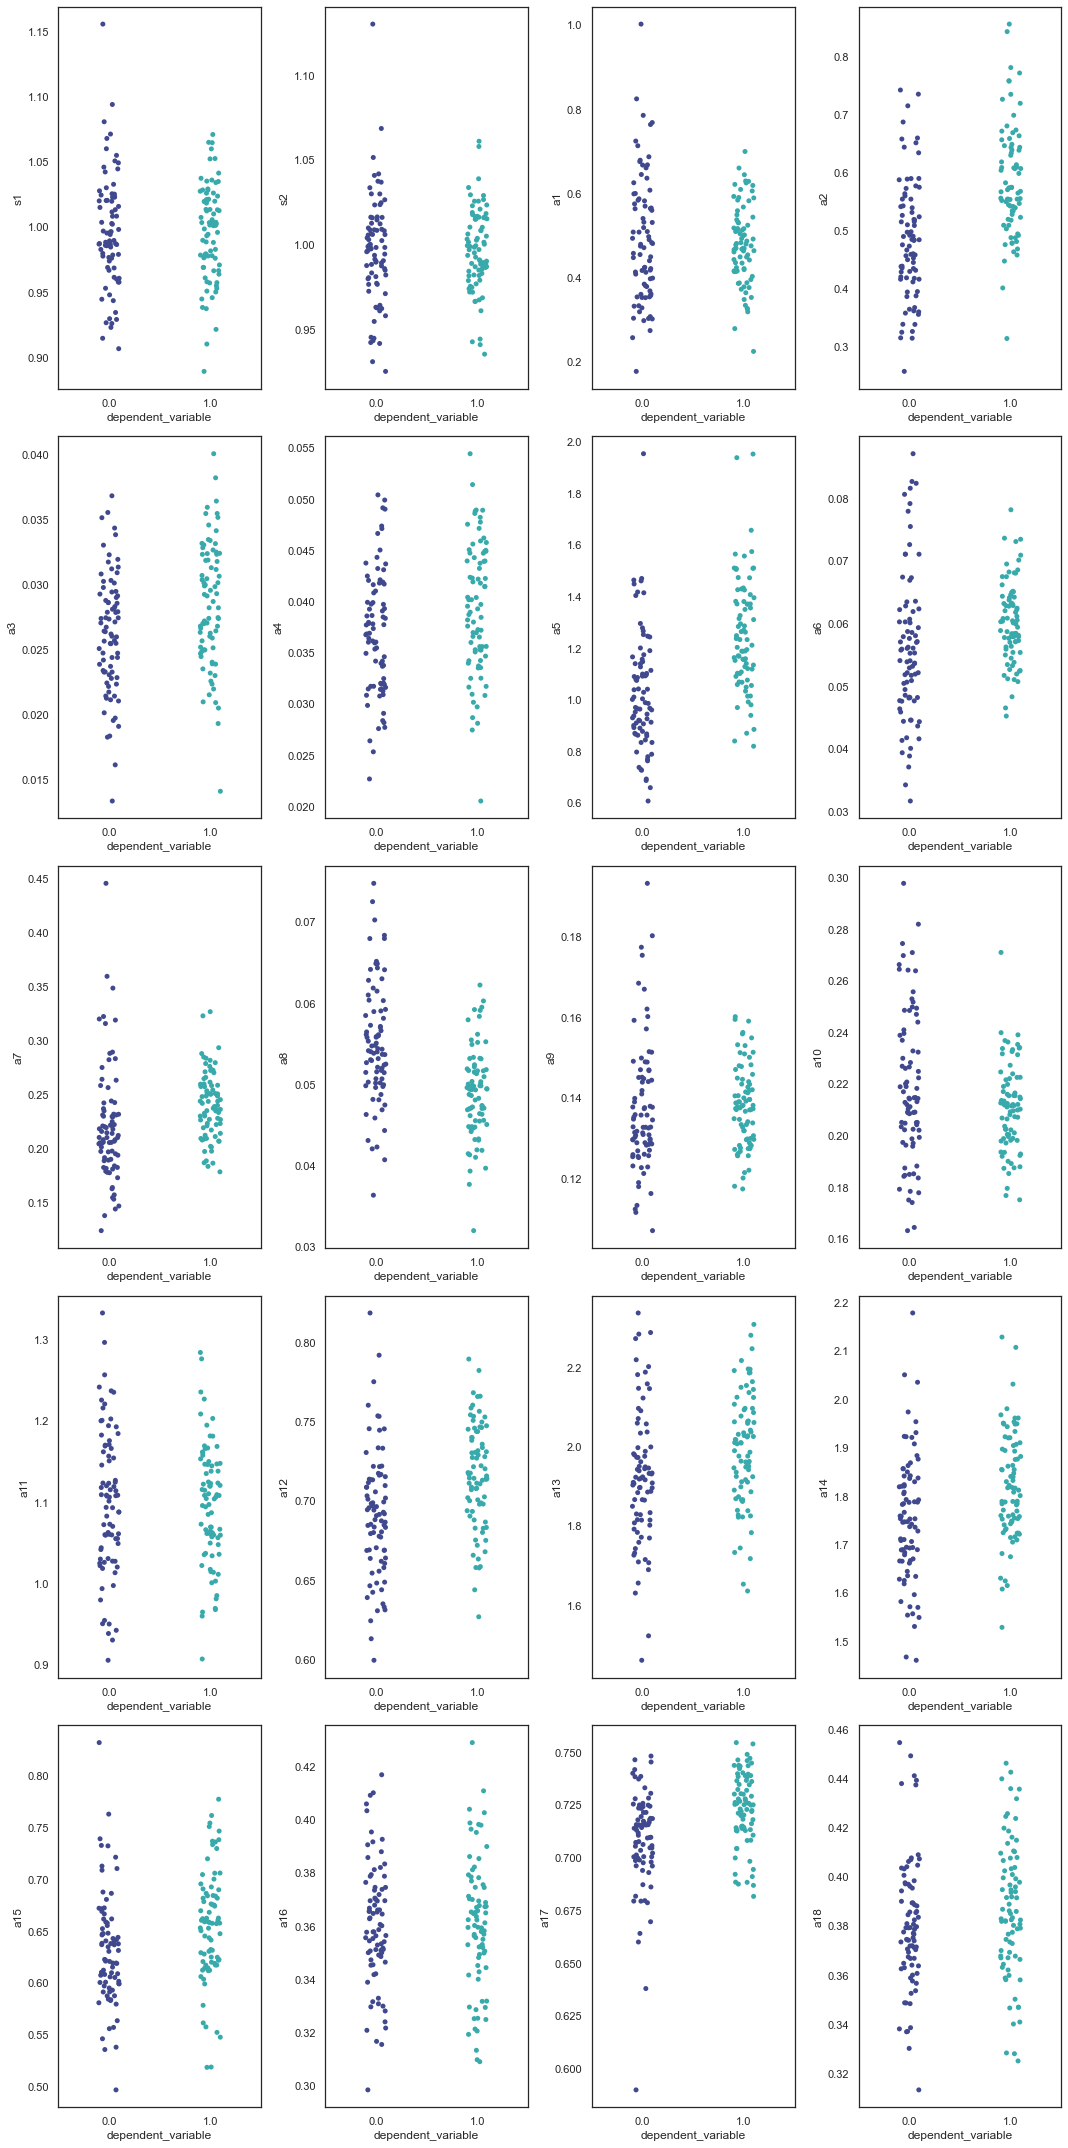

In [199]:
fig, ax = plt.subplots(5,4, figsize=(15,30))
columns = list(X_train.columns)

k = 0
for i in range(0,5):
    for j in range(0,4):
        ax[i][j] = sns.stripplot(x= 'dependent_variable', y = str(columns[k]),
                     data=dataset, ax = ax[i][j], palette = 'mako')
        k += 1

fig.tight_layout()
fig.show()        

There are a couple of things we can notice. Firstly, the maximum and minimum values of both groups always overlap, and there are no great differences between their means. Their interquartile ranges mostly overlap except for a few cases. Lastly, on average, the interquartile range of group 1 is more narrow than the interquartile range of group 0. This might mean that group 0 has a greateer variety in its data, and the individual subjects are more diverse than those from group 1. 

#### Correlation

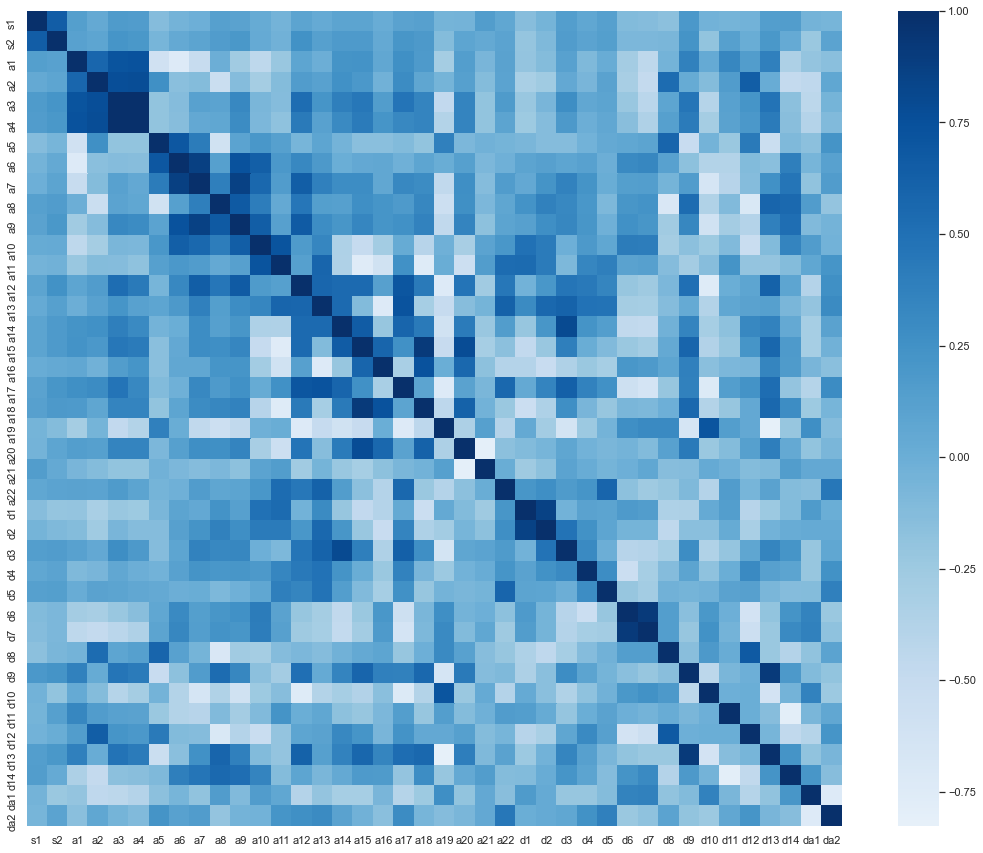

In [220]:
plt.figure(figsize=(20, 15))
sns.set(style="white")
corr = X_train.corr('pearson')
cmap = sns.diverging_palette(600, 550, as_cmap=True)
sns.heatmap(corr, cmap='Blues', center=0,
            square=True, annot = False);

With such high number of independent variables, it is quite difficult to read this heatmap. Let's modify it a bit to make it more comprehensible and display features with correlation over 0.8

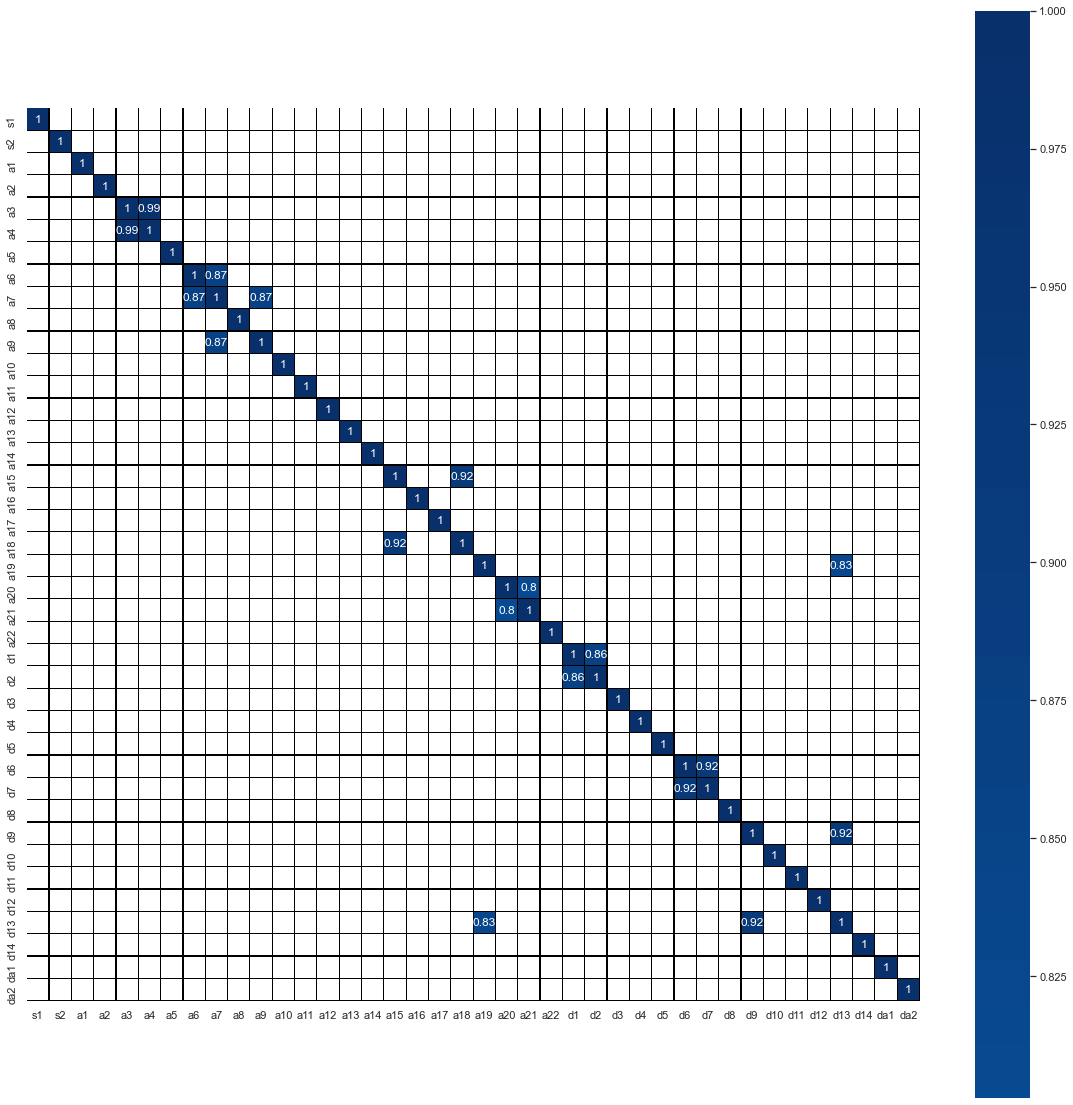

In [221]:
sns.set(style="white")
corr = X_train.corr('pearson').abs()
mask = np.zeros_like(corr, dtype=np.bool)

mask = corr < 0.8

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(600, 550, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap='Blues', center=0,
            square=True, annot = True, linewidths=.2, linecolor = 'black');

In [223]:
correlated_features = set()
correlation_matrix = X_train.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

{'a21', 'd13', 'd2', 'a7', 'a4', 'a18', 'd7', 'a9'}


In [224]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

since heatmaps don't include binary variables, we will check correlations betwen our independent and target variables using point-biserial analysis

In [227]:
stats.pointbiserialr(dataset.dependent_variable, dataset.a1)

columns = list(dataset.columns)
for column in columns:
    if column != 'dependent_variable':
        p_value = stats.pointbiserialr(dataset.dependent_variable, dataset[column])[1]
        correlation = stats.pointbiserialr(dataset.dependent_variable, dataset[column])[0]
        if p_value > 0.05:
            table.append([column, 
                          round(correlation, 3), 
                         round(p_value, 4), 
                          ""])
        else:
            table.append([column, 
                          round(correlation, 3), 
                         round(p_value, 4), 
                          "SIGNIFICANT"])
            
output = tabulate(table, headers = ["variable", "correlation", "p value", "is significant?"], tablefmt = 'fancy_grid')
print(output)

╒════════════╤═══════════════╤═══════════╤═══════════════════╕
│ variable   │   correlation │   p value │ is significant?   │
╞════════════╪═══════════════╪═══════════╪═══════════════════╡
│ s1         │         0.986 │    0.195  │                   │
├────────────┼───────────────┼───────────┼───────────────────┤
│ s2         │         0.949 │    0.0001 │ SIGNIFICANT       │
├────────────┼───────────────┼───────────┼───────────────────┤
│ a1         │         0.965 │    0.0022 │ SIGNIFICANT       │
├────────────┼───────────────┼───────────┼───────────────────┤
│ a2         │         0.99  │    0.509  │                   │
├────────────┼───────────────┼───────────┼───────────────────┤
│ a3         │         0.995 │    0.9408 │                   │
├────────────┼───────────────┼───────────┼───────────────────┤
│ a4         │         0.996 │    0.9767 │                   │
├────────────┼───────────────┼───────────┼───────────────────┤
│ a5         │         0.974 │    0.0135 │ SIGNIFICANT 

Whe we look at the results of the point biserial tests, we can see that we don't have any alraming correlations for low p value results. Based on our EDA let's create two datasets, a raw one, and one with mofifications based on correlations and gaussian distributions.

In [226]:
stats.pointbiserialr(dataset.dependent_variable, dataset.a1)

PointbiserialrResult(correlation=-0.057691225819098635, pvalue=0.46727402292459674)

In [165]:
modified_dataset = dataset
modified_dataset = modified_dataset.drop(variables_to_remove, axis = 1)

#### Train test split

In [167]:
X = dataset.drop('dependent_variable', axis = 1)
y = dataset['dependent_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27, stratify = y)

## Modeling

#### Benchmark model - logistic regression

In [208]:
logistic_regression_model = LogisticRegression()

params = {"penalty" : ["l1", "l2","none"],
              "max_iter" : [10,20,50,100,150,200,300,400]}

          
kfold = StratifiedKFold(n_splits=5,  random_state=True)
grid_search_logistic_regression = GridSearchCV(logistic_regression_model, params, n_jobs=5, 
                                               cv=kfold,  scoring='accuracy', verbose=2, refit=True)   

grid_search_logistic_regression.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 111 out of 120 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    3.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=True, shuffle=False),
             estimator=LogisticRegression(), n_jobs=5,
             param_grid={'max_iter': [10, 20, 50, 100, 150, 200, 300, 400],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='accuracy', verbose=2)

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80        17
         1.0       0.80      0.75      0.77        16

    accuracy                           0.79        33
   macro avg       0.79      0.79      0.79        33
weighted avg       0.79      0.79      0.79        33

SCORE : 0.7878787878787878
BEST PARAMETERS : {'max_iter': 300, 'penalty': 'none'}


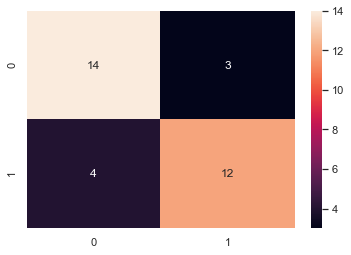

In [209]:
y_pred = grid_search_logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred))
print("SCORE :",grid_search_logistic_regression.score(X_test, y_test))
print("BEST PARAMETERS :", grid_search_logistic_regression.best_params_)

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True);

#### XG BOOST

##### variant 1

In [204]:
params = {"learning_rate":[0.04, 0.05],
              "max_depth":[2,3],
              "min_child_weight":[2,3],
              "gamma":[0.0,0.05],
              "colsample_bytree":[0.5,0.6],
              "n_estimators":[20,50],
              "scale_pos_weight" : [6,7],
              "subsample" : [0.3,0.5],
               "reg_alpha" : [0,1,5],
                 "reg_lambda" : [0,1,5,10]}

model_xgb = XGBClassifier(random_state = 1)
kfold = StratifiedKFold(n_splits=5,  random_state=True)

grid_search_xgboost = GridSearchCV(model_xgb, params, n_jobs=5, cv=kfold,  scoring='accuracy', verbose=2, refit=True)
grid_search_xgboost.fit(X_train, y_train)

y_pred_2 = grid_search_xgboost.predict(X_test)

Fitting 5 folds for each of 3072 candidates, totalling 15360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 558 tasks      | elapsed:    7.9s
[Parallel(n_jobs=5)]: Done 1370 tasks      | elapsed:   20.8s
[Parallel(n_jobs=5)]: Done 2502 tasks      | elapsed:   38.8s
[Parallel(n_jobs=5)]: Done 3962 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 5742 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 7850 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 10278 tasks      | elapsed:  3.0min
[Parallel(n_jobs=5)]: Done 13034 tasks      | elapsed:  3.8min
[Parallel(n_jobs=5)]: Done 15351 out of 15360 | elapsed:  4.5min remaining:    0.1s
[Parallel(n_jobs=5)]: Done 15360 out of 15360 | elapsed:  4.5min finished


[22:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80        17
         1.0       0.75      0.94      0.83        16

    accuracy                           0.82        33
   macro avg       0.84      0.82      0.82        33
weighted avg       0.84      0.82      0.82        33

TEST SCORE : 0.8181818181818182
AxesSubplot(0.125,0.125;0.62x0.755)
BEST PARAMETERS  {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50, 'reg_alpha': 1, 'reg_lambda': 1, 'scale_pos_weight': 6, 'subsample': 0.5}


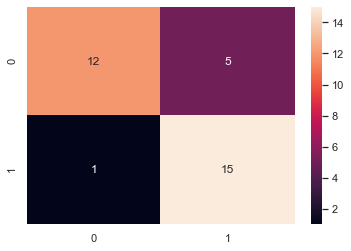

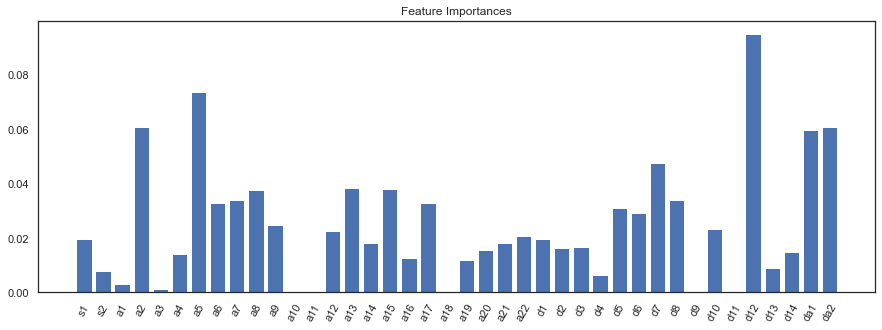

In [205]:
print(classification_report(y_test, y_pred_2))
print("TEST SCORE :",grid_search_xgboost.score(X_test, y_test))

print(sns.heatmap(confusion_matrix(y_test, y_pred_2), annot = True))
print("BEST PARAMETERS ", grid_search_xgboost.best_params_)


plt.figure(figsize = (15,5))
plt.bar(np.arange(X.shape[1]), grid_search_xgboost.best_estimator_.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation = 60)
plt.title('Feature Importances');
plt.show()

###### variant 2

In [200]:
params = {"learning_rate":[0.05, 0.06],
              "max_depth":[3,4],
              "min_child_weight":[1,2],
              "colsample_bytree":[0.5,0.6],
              "n_estimators":[40,50,60],
              "scale_pos_weight" : [5,6],
              "subsample" : [0.4,0.5,0.6],
               "reg_alpha" : [5,10]}

model_xgb_2 = XGBClassifier(random_state = 1)
kfold = StratifiedKFold(n_splits=5,  random_state=True)

grid_search_xgboost_2 = GridSearchCV(model_xgb_2, params, n_jobs=5, cv=kfold,  scoring='accuracy', verbose=2, refit=True)
grid_search_xgboost_2.fit(X_train, y_train)

y_pred_3 = grid_search_xgboost_2.predict(X_test)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 259 tasks      | elapsed:    7.6s
[Parallel(n_jobs=5)]: Done 665 tasks      | elapsed:   17.1s
[Parallel(n_jobs=5)]: Done 1231 tasks      | elapsed:   29.6s
[Parallel(n_jobs=5)]: Done 1961 tasks      | elapsed:   45.6s
[Parallel(n_jobs=5)]: Done 2851 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 2871 out of 2880 | elapsed:  1.1min remaining:    0.1s
[Parallel(n_jobs=5)]: Done 2880 out of 2880 | elapsed:  1.1min finished


[22:34:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

         0.0       0.92      0.65      0.76        17
         1.0       0.71      0.94      0.81        16

    accuracy                           0.79        33
   macro avg       0.82      0.79      0.78        33
weighted avg       0.82      0.79      0.78        33

TEST SCORE : 0.7878787878787878
AxesSubplot(0.125,0.125;0.62x0.755)
BEST PARAMETERS  {'colsample_bytree': 0.6, 'learning_rate': 0.06, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 5, 'scale_pos_weight': 5, 'subsample': 0.6}


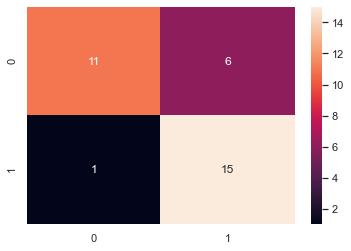

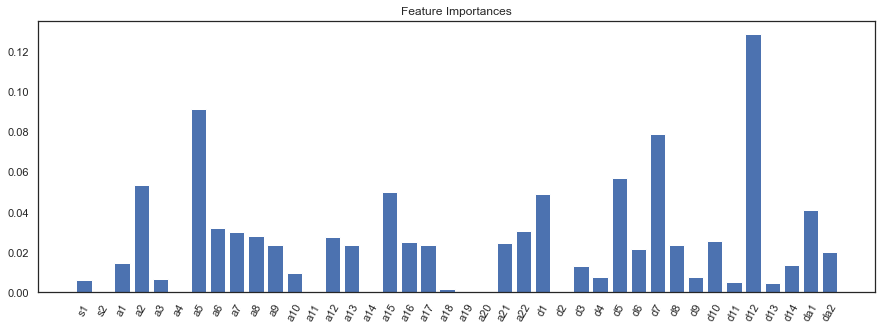

In [201]:
print(classification_report(y_test, y_pred_3))
print("TEST SCORE :",grid_search_xgboost_2.score(X_test, y_test))

print(sns.heatmap(confusion_matrix(y_test, y_pred_3), annot = True))
print("BEST PARAMETERS ", grid_search_xgboost_2.best_params_)

plt.figure(figsize = (15,5))
plt.bar(np.arange(X.shape[1]), grid_search_xgboost_2.best_estimator_.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation = 60)
plt.title('Feature Importances');
plt.show()

In [ ]:
learning_rate, max_depth, min_child_weight,
gamma, colsample_bytree, n_estimators, scale_pos_weight, 
subsample, alpha and lambda l1 and l2 regularization

### Elastic Net

In [219]:
params = {"penalty" : ["elasticnet"],
              "max_iter" : [10,20,50,100,150,200,300,400,500,600],
                 "l1_ratio" : [0, 0.001, 0.01, 0.1, 0.2, 0.5, 1,10],
                 "solver" : ["saga"]}
    
logistic_regression_model = LogisticRegression()

          
kfold = StratifiedKFold(n_splits=5,  random_state=True)
grid_search_elastic_net = GridSearchCV(logistic_regression_model, params, n_jobs=5, 
                                               cv=kfold,  scoring='accuracy', verbose=2, refit=True)   

grid_search_elastic_net.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 400 out of 400 | elapsed:    2.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=True, shuffle=False),
             estimator=LogisticRegression(), n_jobs=5,
             param_grid={'l1_ratio': [0, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 10],
                         'max_iter': [10, 20, 50, 100, 150, 200, 300, 400, 500,
                                      600],
                         'penalty': ['elasticnet'], 'solver': ['saga']},
             scoring='accuracy', verbose=2)

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80        17
         1.0       0.80      0.75      0.77        16

    accuracy                           0.79        33
   macro avg       0.79      0.79      0.79        33
weighted avg       0.79      0.79      0.79        33

SCORE : 0.7575757575757576
BEST PARAMETERS : {'l1_ratio': 0, 'max_iter': 600, 'penalty': 'elasticnet', 'solver': 'saga'}


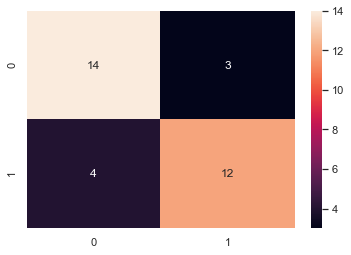

In [220]:
y_pred_5 = grid_search_logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred_5))
print("SCORE :",grid_search_elastic_net.score(X_test, y_test))
print("BEST PARAMETERS :", grid_search_elastic_net.best_params_)

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True);

#### Random Forest Classifier

#### Variant 1

In [221]:
params = {"n_estimators":[10,50,100, 200, 300],
              "max_features":['auto', 'sqrt'],
              "max_depth":[1,2,3,4],
              "min_samples_split":[1,2,5],
              "min_samples_leaf":[1,2,5],
              "bootstrap" : [True, False]}

random_forest = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=5,  random_state=True)

grid_search_random_forest = GridSearchCV(random_forest, params, n_jobs=5, cv=kfold,  scoring='accuracy', verbose=2, refit=True)
grid_search_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    4.2s
[Parallel(n_jobs=5)]: Done 259 tasks      | elapsed:   14.4s
[Parallel(n_jobs=5)]: Done 665 tasks      | elapsed:   34.5s
[Parallel(n_jobs=5)]: Done 1231 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 1961 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 2851 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 3591 out of 3600 | elapsed:  2.8min remaining:    0.3s
[Parallel(n_jobs=5)]: Done 3600 out of 3600 | elapsed:  2.9min finished


NameError: name 'grid_search_random_fores' is not defined

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86        17
         1.0       0.87      0.81      0.84        16

    accuracy                           0.85        33
   macro avg       0.85      0.85      0.85        33
weighted avg       0.85      0.85      0.85        33

SCORE : 0.8484848484848485
BEST PARAMETERS : {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


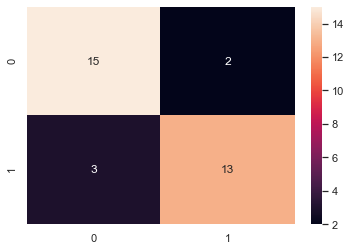

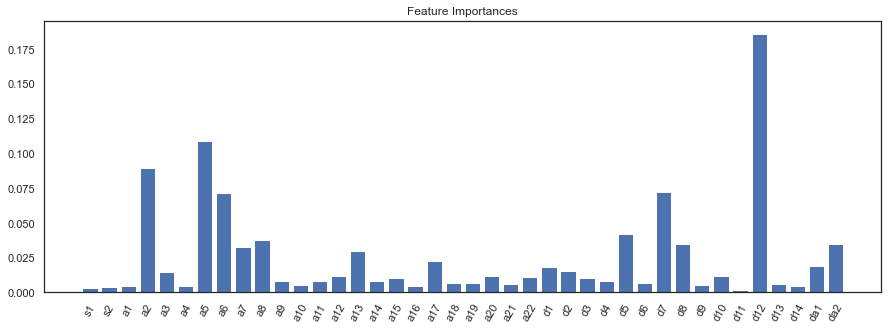

In [222]:
y_pred_6 = grid_search_random_forest.predict(X_test)

print(classification_report(y_test, y_pred_6))
print("SCORE :",grid_search_random_forest.score(X_test, y_test))
print("BEST PARAMETERS :", grid_search_random_forest.best_params_)

sns.heatmap(confusion_matrix(y_test, y_pred_6), annot = True);

plt.figure(figsize = (15,5))
plt.bar(np.arange(X.shape[1]), grid_search_random_forest.best_estimator_.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation = 60)
plt.title('Feature Importances');
plt.show()

#### Testing the best model on modified data

In [233]:
scaler = MinMaxScaler()

modified_dataset_scaled = pd.DataFrame(scaler.fit_transform(modified_dataset.values), 
                  columns=modified_dataset.columns, 
                  index=modified_dataset.index)

In [236]:
X_modified = modified_dataset_scaled.drop('dependent_variable', axis = 1)
y_modified = modified_dataset_scaled['dependent_variable']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_modified, y_modified, test_size = 0.2, random_state = 27, stratify = y)

In [237]:
grid_search_random_forest.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 204 tasks      | elapsed:   11.6s
[Parallel(n_jobs=5)]: Done 610 tasks      | elapsed:   30.4s
[Parallel(n_jobs=5)]: Done 1176 tasks      | elapsed:   58.1s
[Parallel(n_jobs=5)]: Done 1906 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 2796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 3600 out of 3600 | elapsed:  2.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=True, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='accuracy', verbose=2)

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        17
         1.0       0.94      0.94      0.94        16

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33

SCORE : 0.9393939393939394
BEST PARAMETERS : {'bootstrap': True, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


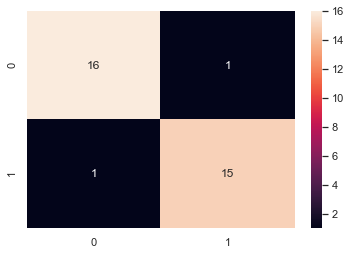

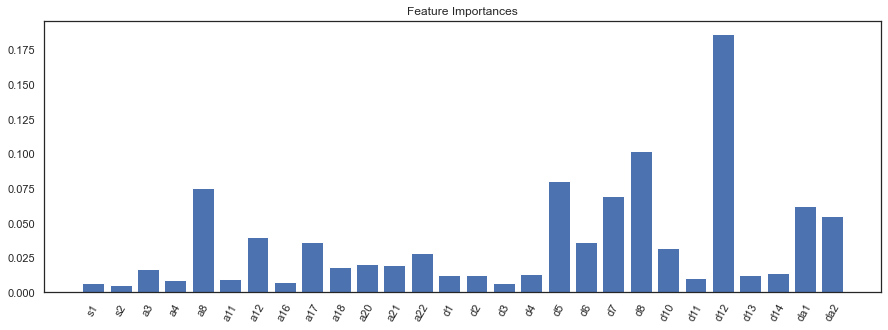

In [240]:
y_pred_7 = grid_search_random_forest.predict(X_test_2)

print(classification_report(y_test_2, y_pred_7))
print("SCORE :",grid_search_random_forest.score(X_test_2, y_test_2))
print("BEST PARAMETERS :", grid_search_random_forest.best_params_)

sns.heatmap(confusion_matrix(y_test_2, y_pred_7), annot = True);

plt.figure(figsize = (15,5))
plt.bar(np.arange(X_modified.shape[1]), grid_search_random_forest.best_estimator_.feature_importances_)
plt.xticks(np.arange(X_modified.shape[1]), X_modified.columns, rotation = 60)
plt.title('Feature Importances');
plt.show()

When we get rid of highly correlated variables, and use a min max scaling on our dataset, we increase our accurace to 94%! This shows the importance of feature engineering

#### Conclusions

Random Forest Classifier has performed the best. Once we applied an engineered dataset rid of correlations, we 
were able to reach a very satisfying score.

What comes next:
- get more data - to make this project more reliable, I need at least 300 objects for each group
- try feature engineering - create variables out of the existing ones
- obtain more unique variables from the computer vision algorithm outputs

## Sources

https://www.v7labs.com/blog/train-validation-test-set 

https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/